In [1]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
from collections import defaultdict

In [2]:
sns.set()

In [3]:
competitions = pd.read_json('../Datasets/statsbomb-open-data/data/competitions.json')

In [4]:
competitions_female = competitions[competitions['competition_gender'] == 'female']

In [5]:
competitions_female

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
15,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
16,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-02-25T12:45:18.376026,2021-06-13T16:17:31.694,None,2023-02-25T12:45:18.376026
17,37,4,England,FA Women's Super League,female,False,False,2018/2019,2022-12-01T11:41:40.025541,2021-06-13T16:17:31.694,None,2022-12-01T11:41:40.025541
38,49,3,United States of America,NWSL,female,False,False,2018,2022-11-22T00:50:34.050564,2021-06-13T16:17:31.694,None,2022-11-22T00:50:34.050564
41,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-02-22T23:06:39.942980,2023-04-14T11:34:39.799826,2023-04-14T11:34:39.799826,2023-02-22T23:06:39.942980
42,72,30,International,Women's World Cup,female,False,True,2019,2023-04-07T09:00:52.515359,2021-06-13T16:17:31.694,None,2023-04-07T09:00:52.515359


In [6]:
Super_2020 = pd.read_json('../Datasets/statsbomb-open-data/data/matches/37/90.json')

In [7]:
Super_2019 = pd.read_json('../Datasets/statsbomb-open-data/data/matches/37/42.json')

In [8]:
Super_2018 = pd.read_json('../Datasets/statsbomb-open-data/data/matches/37/4.json')

In [9]:
NWSL_2018 = pd.read_json('../Datasets/statsbomb-open-data/data/matches/49/3.json')

In [10]:
Super_2020.shape

(131, 18)

In [11]:
Super_2019.shape

(87, 18)

In [12]:
Super_2018.shape

(108, 18)

In [13]:
NWSL_2018.shape

(36, 18)

In [16]:
def get_country_count(league):
    country_ct = {}
    match_list = league['match_id']
    missing_match = []

    for match in match_list:
        try:
            with open('../Datasets/statsbomb-open-data/data/lineups/'+str(match)+'.json', encoding='utf-8') as j:
                match_t = json.load(j)
        except FileNotFoundError:
            missing_match.append(match)
            continue

        for i in range(len(match_t[0]['lineup'])):
            country = match_t[0]['lineup'][i]['country']['name']
            if country in country_ct:
                country_ct[country] += 1
            else:
                country_ct[country] = 1

        for i in range(len(match_t[1]['lineup'])):
            country = match_t[1]['lineup'][i]['country']['name']
            if country in country_ct:
                country_ct[country] += 1
            else:
                country_ct[country] = 1    
           
    return country_ct, missing_match


In [32]:
Super_2020_country, missing = get_country_count(Super_2020)
print(missing)

[]


In [35]:
Super_2019_country, missing = get_country_count(Super_2019)
print(missing)

[]


In [36]:
Super_2018_country, missing = get_country_count(Super_2018)
print(missing)

[]


In [37]:
NWSL_2018_country, missing  = get_country_count(NWSL_2018)
print(missing)

[]


In [44]:
Super_2020_df =pd.DataFrame(list(Super_2020_country.items()), columns=['nationality', 'Super_2020'])

In [45]:
Super_2019_df =pd.DataFrame(list(Super_2019_country.items()), columns=['nationality', 'Super_2019'])

In [46]:
Super_2018_df =pd.DataFrame(list(Super_2018_country.items()), columns=['nationality', 'Super_2018'])

In [47]:
Super_all = pd.merge(Super_2018_df, Super_2019_df, on='nationality', how = 'outer').merge(
    Super_2020_df, on='nationality', how = 'outer')

In [62]:
Super_all['Super_2018'] = Super_all['Super_2018'].astype('int')
Super_all['Super_2019'] = Super_all['Super_2019'].astype('int')
Super_all['Super_2020'] = Super_all['Super_2020'].astype('int')

In [63]:
Super_all

,nationality,Super_2018,Super_2019,Super_2020
0,Sweden,64,62,80
1,Norway,15,103,195
2,Jamaica,61,29,52
4,Korea (South),25,36,70
5,Switzerland,49,37,78
6,Scotland,241,248,292
7,United States of America,54,34,76
8,Denmark,21,18,81
9,Canada,16,28,76
10,Belgium,52,30,22


In [53]:
Super_all = Super_all[Super_all['nationality'] != 'England']

In [56]:
Super_all = Super_all.fillna(0)

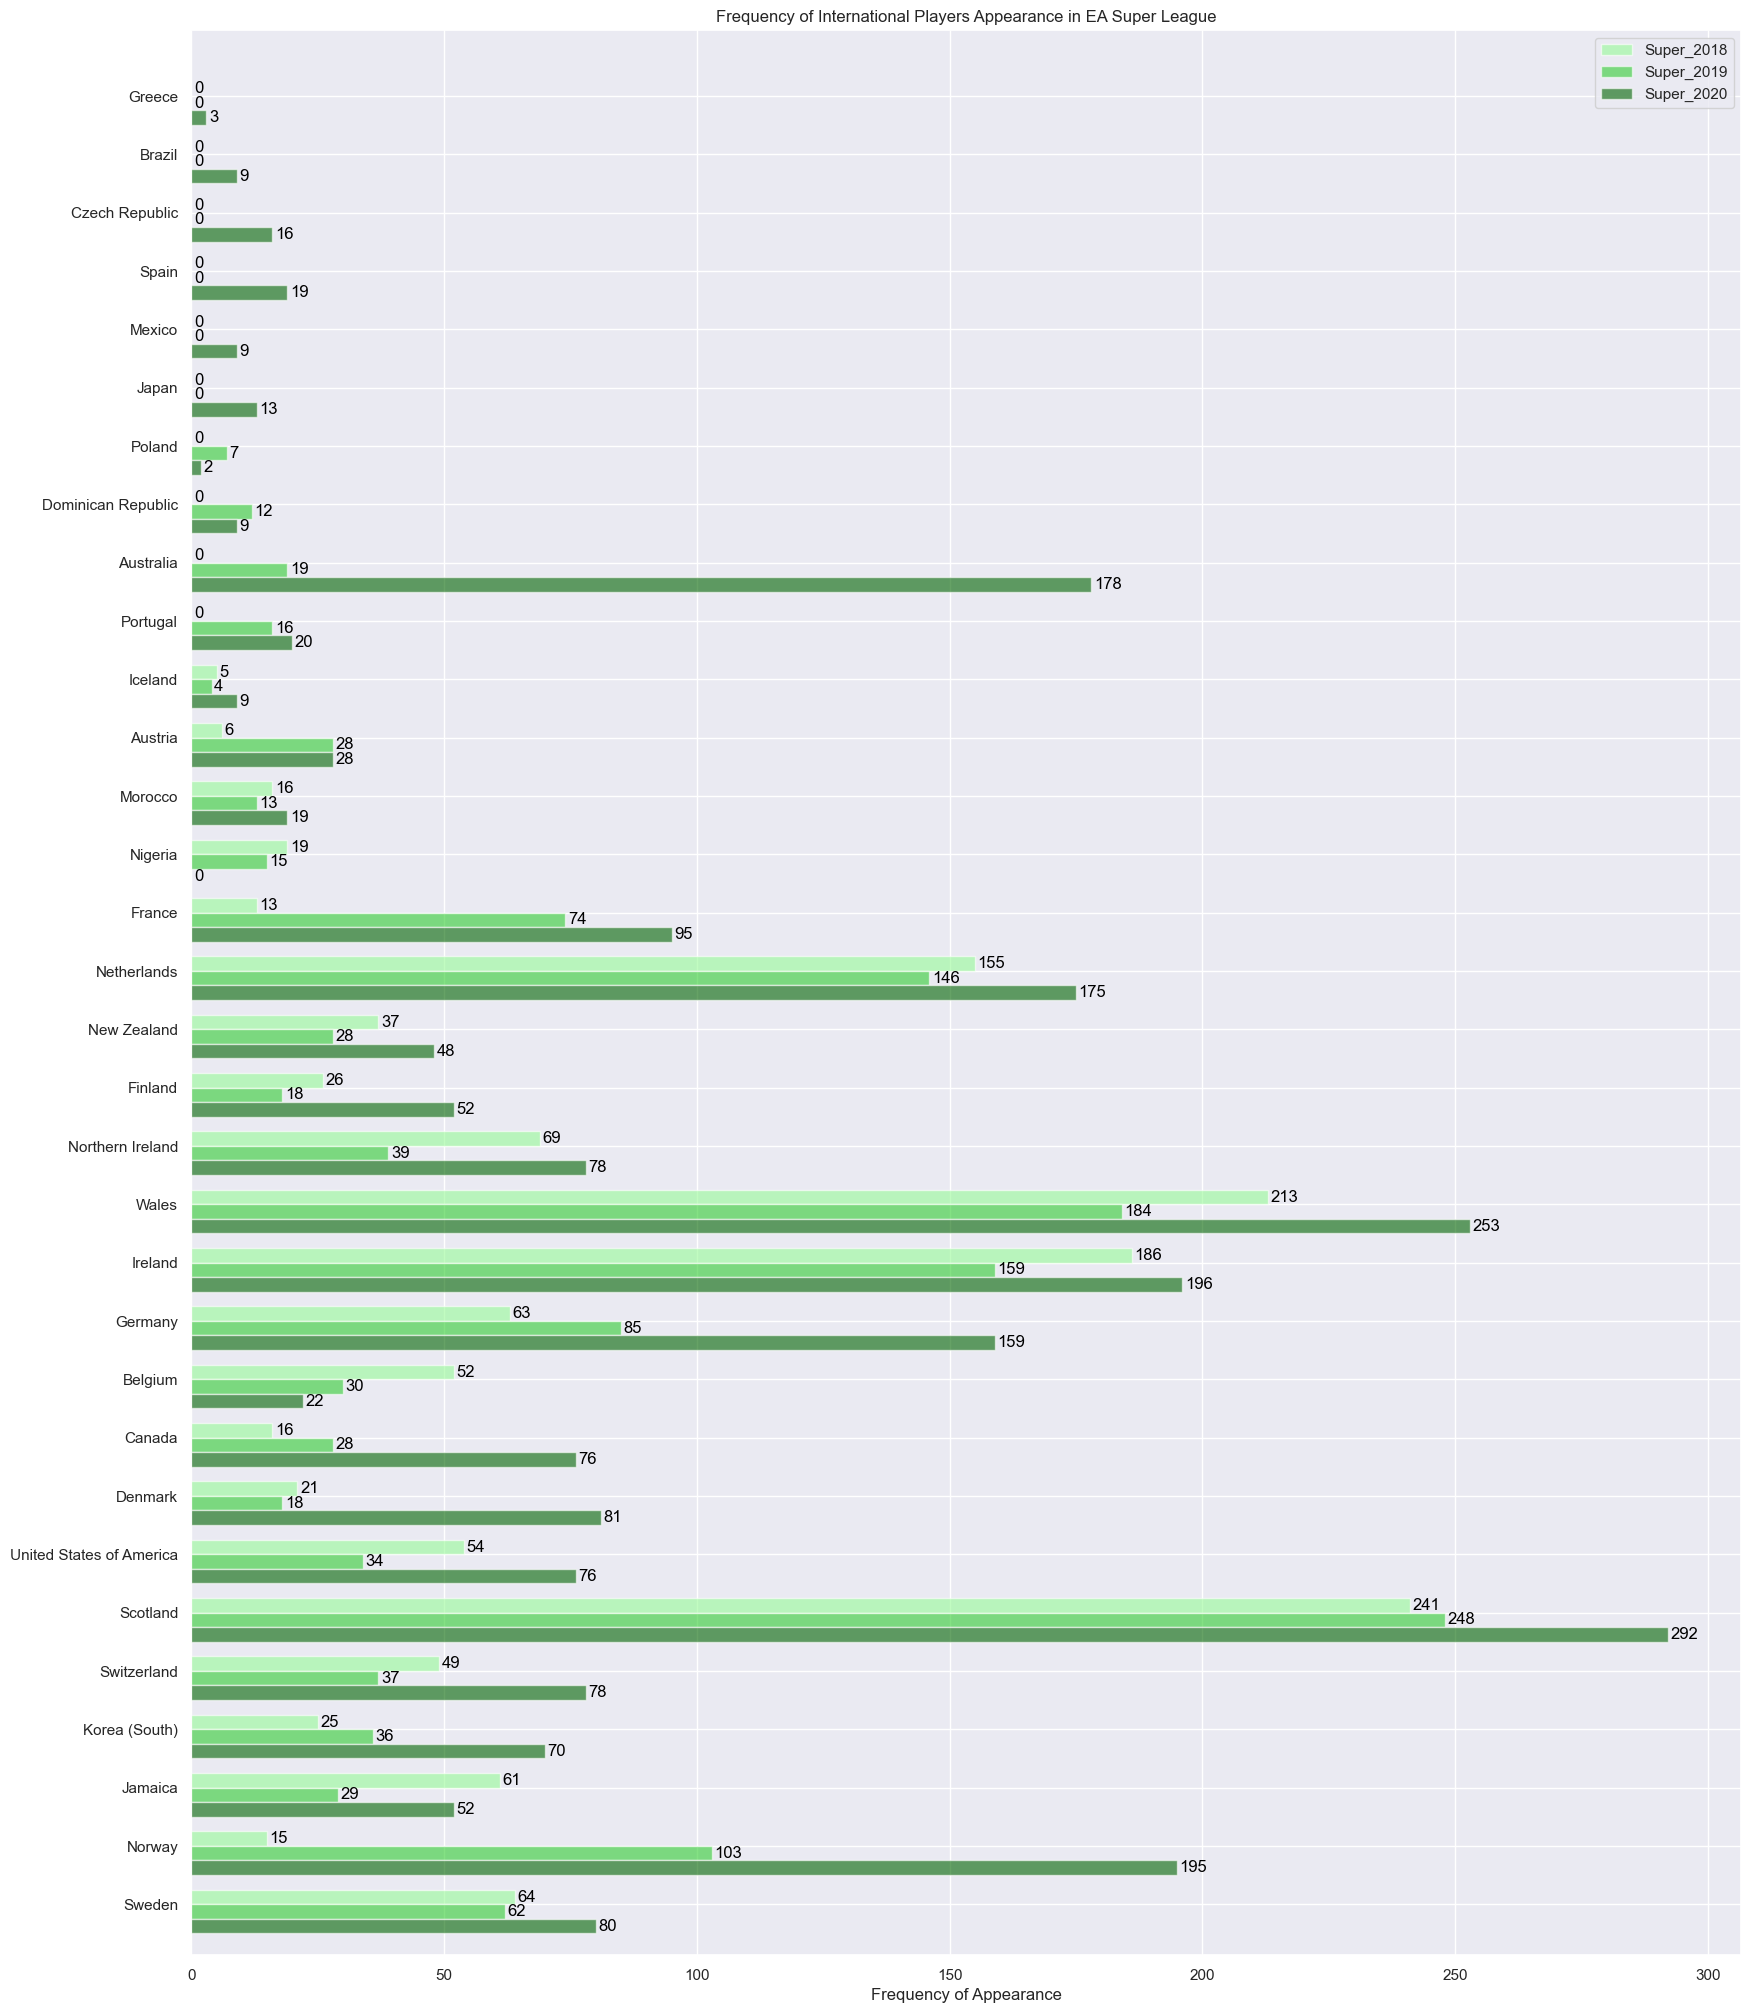

In [71]:
fig, ax = plt.subplots(figsize =(20, 25))
country = Super_all.nationality
Super_2018  = Super_all['Super_2018']
Super_2019  = Super_all['Super_2019']
Super_2020  = Super_all['Super_2020']

ind = np.arange(len(country))
width=0.25 

ax = plt.subplot(111)
ax.barh(ind, Super_2018, width, align='center', alpha=0.6, color='palegreen', label='Super_2018') 
ax.barh(ind - width, Super_2019, width, align='center', alpha=0.6, color='limegreen', label='Super_2019') 
ax.barh(ind - width * 2, Super_2020, width, align='center', alpha=0.6, color='darkgreen', label='Super_2020')  

for i, (x, y1, y2, y3) in enumerate(zip(ind, Super_2018, Super_2019, Super_2020)):
    ax.text(y3 + 0.5, i - width * 2, str(y3), ha='left', va='center', color='black')
    ax.text(y2 + 0.5, i - width, str(y2), ha='left', va='center', color='black')
    ax.text(y1 + 0.5, i, str(y1), ha='left', va='center', color='black')

ax.set(yticks=ind - width/2, yticklabels=country, ylim=[- 1, len(country)])
plt.xlabel('Frequency of Appearance')
plt.title('Frequency of International Players Appearance in EA Super League')
plt.legend()
plt.savefig('../imgs/Statsbomb/Super_country_count.png',bbox_inches='tight')

In [73]:
NWSL_2018_country

{'United States of America': 682,
 'Canada': 65,
 'South Africa': 12,
 'England': 19,
 'Australia': 61,
 'Iceland': 9,
 'Scotland': 9,
 'New Zealand': 26,
 'Switzerland': 7,
 'Japan': 17,
 'Brazil': 42,
 'Ireland': 11,
 'Cameroon': 10,
 'Jamaica': 7,
 'Nigeria': 7,
 'Wales': 5,
 'Norway': 2,
 'Costa Rica': 4,
 'Mexico': 6,
 'Denmark': 6,
 'Ghana': 3,
 'Argentina': 5,
 'Bosnia and Herzegovina': 2}

In [74]:
NWSL_2018_country.pop('United States of America')

682

In [80]:
def plot_count(country_ct, league):
    country_ct_df = pd.Series(country_ct)
    country_ct_df.sort_values(ascending = False, inplace = True)
    fig, ax = plt.subplots(figsize =(14, 8))
    ax.barh(country_ct_df.index, country_ct_df.values, color = 'lightseagreen', height = 0.4)
    ax.invert_yaxis()
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
    ax.set_title('Frequency of International Players Appearance in '+ league,
                 loc ='left')
    plt.savefig('../imgs/Statsbomb/NWSL_country_count.png',bbox_inches='tight')

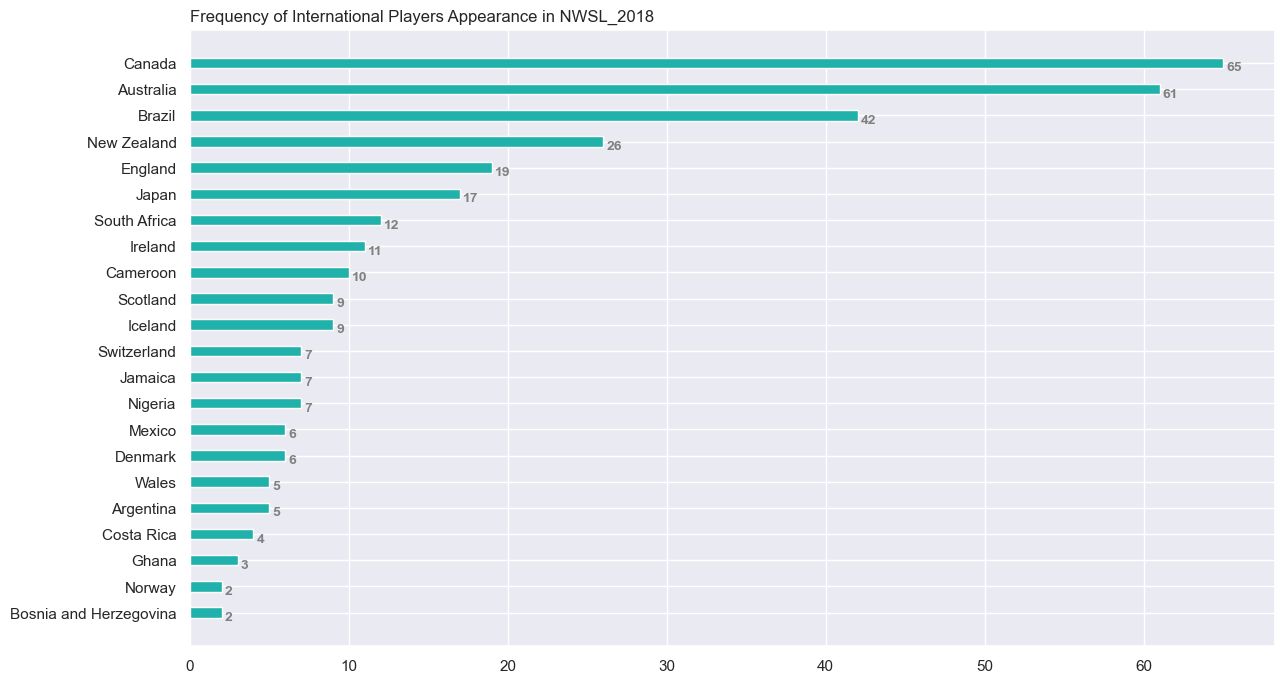

In [81]:
plot_count(NWSL_2018_country, 'NWSL_2018')